In [1]:
import os
os.chdir('..')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib
from collections import defaultdict, namedtuple

SearchCVResult = namedtuple("SearchCVResult", ["cv_results_", "best_params_", "best_score_"])

In [3]:
dataset_names = [
    "blood-transfusion-service-center",
    "credit-g",
    "diabetes",
    "churn",
    "ozone-level-8hr",
    "sick",
    "qsar-biodeg",
    "kc1",
]
model_names = ["logistic_regression", "random_forest", "xgb"]

In [11]:
def plot_tunability(results, sampling_method="random_search", defaults="package"):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.boxplot(data=results, x="algorithm", y=f"{sampling_method}_{defaults}_tunability", hue="algorithm", showfliers=False, ax=ax)
    sns.swarmplot(data=results, x="algorithm", y=f"{sampling_method}_{defaults}_tunability", color="k", ax=ax)
    ax.set_xlabel("Algorithm")
    ax.set_ylabel("ROC AUC Tunability")
    fig.tight_layout()
    return fig

In [12]:
def plot_optimization(rs, bo):
    fig, ax = plt.subplots(figsize=(8, 6))

    y_rs = [np.maximum.accumulate(rs[dataset_name] / rs[dataset_name].max()) for dataset_name in rs.keys()]
    y_rs_mean = np.mean(y_rs, axis=0)
    y_rs_std = np.std(y_rs, axis=0)

    y_bo = [np.maximum.accumulate(bo[dataset_name] / bo[dataset_name].max()) for dataset_name in bo.keys()]
    y_bo_mean = np.mean(y_bo, axis=0)
    y_bo_std = np.std(y_bo, axis=0)

    ax.plot(y_rs_mean, "r-", label="Random search")
    ax.fill_between(range(len(y_rs_mean)), y_rs_mean - y_rs_std, y_rs_mean + y_rs_std, alpha=0.1, color="r")
    ax.plot(y_bo_mean, "b-", label="Bayesian optimization")
    ax.fill_between(range(len(y_bo_mean)), y_bo_mean - y_bo_std, y_bo_mean + y_bo_std, alpha=0.1, color="b")
    ax.set_xlabel("Iteration")
    ax.set_ylabel("% of Best ROC AUC")
    ax.legend(loc="lower right")
    return fig

## Optimization

/Users/mikolajpiorczynski/Studies/automl/2023Z-AutoML/.venv/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator SimpleImputer from version 1.3.2 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mikolajpiorczynski/Studies/automl/2023Z-AutoML/.venv/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.3.2 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mikolajpiorczynski/Studies/automl/2023Z-AutoML/.venv/lib/python3.9/site-packages/sklearn/base.py:348: Inconsistent

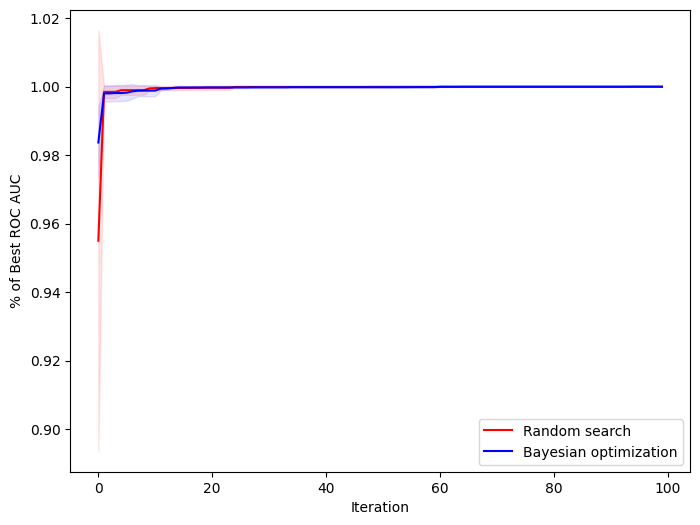

/Users/mikolajpiorczynski/Studies/automl/2023Z-AutoML/.venv/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator SimpleImputer from version 1.3.2 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mikolajpiorczynski/Studies/automl/2023Z-AutoML/.venv/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.3.2 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mikolajpiorczynski/Studies/automl/2023Z-AutoML/.venv/lib/python3.9/site-packages/sklearn/base.py:348: Inconsistent

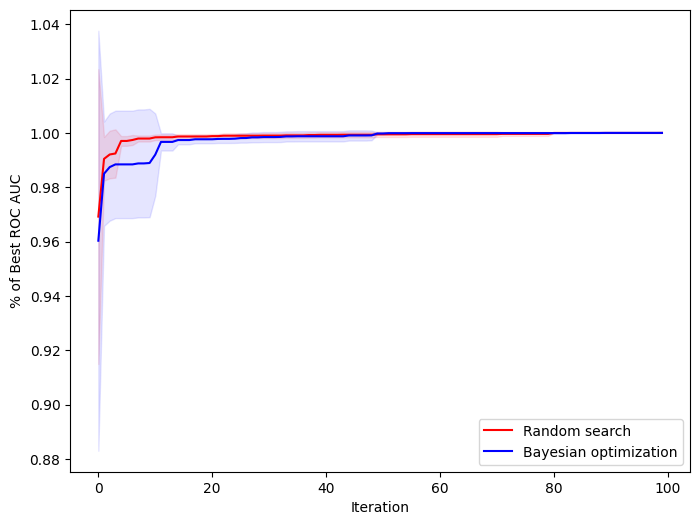

/Users/mikolajpiorczynski/Studies/automl/2023Z-AutoML/.venv/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator SimpleImputer from version 1.3.2 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mikolajpiorczynski/Studies/automl/2023Z-AutoML/.venv/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.3.2 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mikolajpiorczynski/Studies/automl/2023Z-AutoML/.venv/lib/python3.9/site-packages/sklearn/base.py:348: Inconsistent

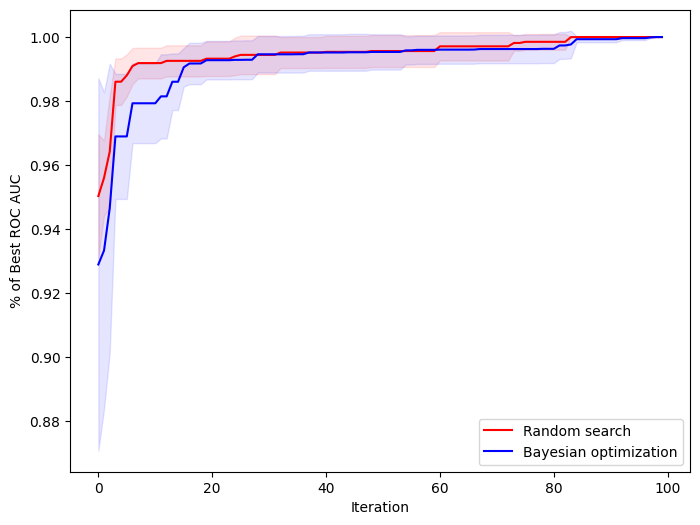

In [25]:
for model_name in model_names:
    results = defaultdict(lambda: defaultdict(np.ndarray))
    for dataset_name in dataset_names:
        results_path = f"Wyniki/rs-{model_name}-{dataset_name}.pkl"
        rs_results = joblib.load(results_path)
        results["rs"][dataset_name] = rs_results.cv_results_['mean_test_score']
        bo_results = joblib.load(results_path.replace("rs", "bo"))
        results["bo"][dataset_name] = bo_results.cv_results_['mean_test_score']

    fig = plot_optimization(rs=results["rs"], bo=results["bo"])
    fig.savefig(f"Wyniki/optimization-{model_name}.pdf", dpi=300)
    plt.show()
    plt.close(fig)

## Tunability

In [34]:
results = pd.read_csv("Wyniki/results.csv")

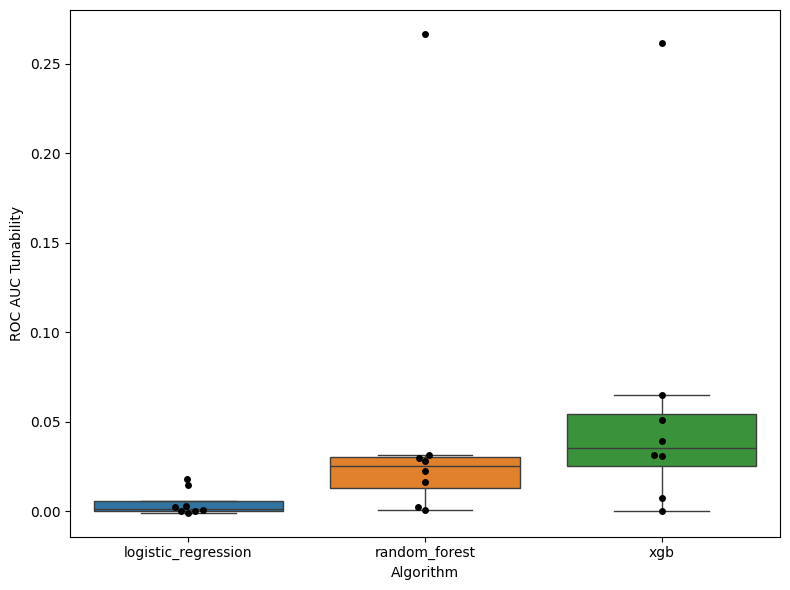

In [35]:
sampling_method="random_search"
defaults="package"

fig = plot_tunability(results, sampling_method=sampling_method, defaults=defaults)
fig.savefig(f"Wyniki/{sampling_method.replace('_', '-')}-{defaults.replace('_', '-')}-tunability.pdf", dpi=300)
plt.show()
plt.close(fig)

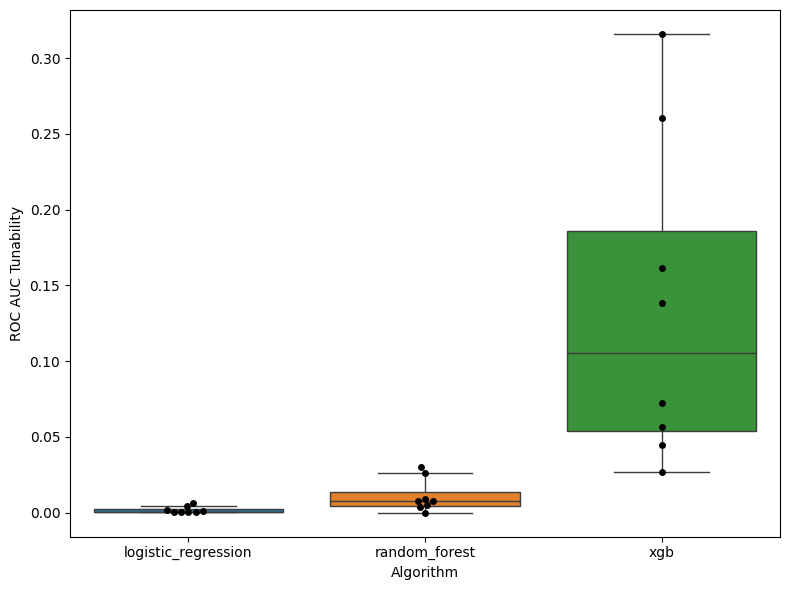

In [36]:
sampling_method="random_search"
defaults="optimal"

fig = plot_tunability(results, sampling_method=sampling_method, defaults=defaults)
fig.savefig(f"Wyniki/{sampling_method.replace('_', '-')}-{defaults.replace('_', '-')}-tunability.pdf", dpi=300)
plt.show()
plt.close(fig)

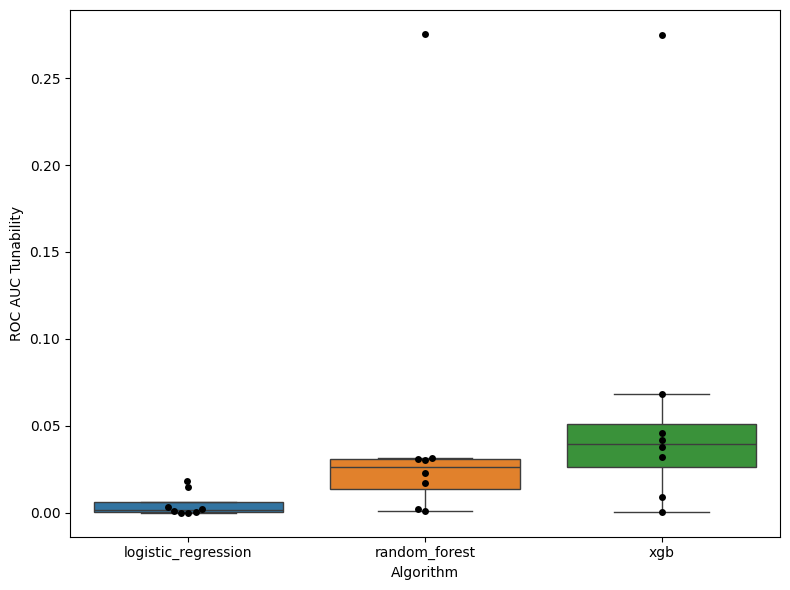

In [37]:
sampling_method="bayesian_optimization"
defaults="package"

fig = plot_tunability(results, sampling_method=sampling_method, defaults=defaults)
fig.savefig(f"Wyniki/{sampling_method.replace('_', '-')}-{defaults.replace('_', '-')}-tunability.pdf", dpi=300)
plt.show()
plt.close(fig)

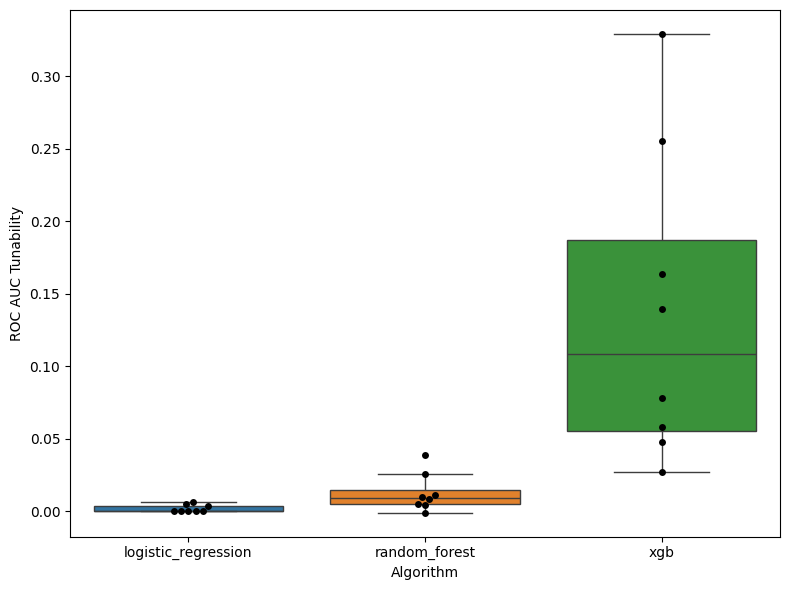

In [38]:
sampling_method="bayesian_optimization"
defaults="optimal"

fig = plot_tunability(results, sampling_method=sampling_method, defaults=defaults)
fig.savefig(f"Wyniki/{sampling_method.replace('_', '-')}-{defaults.replace('_', '-')}-tunability.pdf", dpi=300)
plt.show()
plt.close(fig)

## Sampling bias

In [115]:
from scipy.stats import ttest_ind

def test_statistical_difference(sample1, sample2, alpha=0.05):
    t_stat, p_value = ttest_ind(sample1, sample2, equal_var=False)
    print(f"{sample1.mean()=}")
    print(f"{sample2.mean()=}")
    print(f"{p_value=}")
    return p_value < alpha

In [116]:
defaults = 'package'
for model_name in model_names:
    print(model_name)
    print(test_statistical_difference(results.loc[results['algorithm'] == model_name, f'random_search_{defaults}_tunability'],
                                results.loc[results['algorithm'] == model_name, f'bayesian_optimization_{defaults}_tunability']))

logistic_regression
sample1.mean()=0.0048332674015404056
sample2.mean()=0.005092428780298575
p_value=0.47224914077597197
False
random_forest
sample1.mean()=0.04974447969053295
sample2.mean()=0.05143069270015492
p_value=0.4852964781646387
False
xgb
sample1.mean()=0.060898757008913576
sample2.mean()=0.06376094753457864
p_value=0.4738757161534578
False


In [103]:
defaults = 'optimal'
for model_name in model_names:
    print(model_name)
    print(test_statistical_difference(results.loc[results['algorithm'] == model_name, f'random_search_{defaults}_tunability'],
                                results.loc[results['algorithm'] == model_name, f'bayesian_optimization_{defaults}_tunability']))

logistic_regression
sample1.mean()=0.0018223215410706252
sample2.mean()=0.0020814829198288628
p_value=0.41860242379846846
False
random_forest
sample1.mean()=0.01125582362147735
sample2.mean()=0.012942036631099312
p_value=0.39229222742608183
False
xgb
sample1.mean()=0.13455366470138636
sample2.mean()=0.13741585522705146
p_value=0.47905322061244016
False


In [104]:
sampling_method = 'random_search'
for model_name in model_names:
    print(model_name)
    print(test_statistical_difference(results.loc[results['algorithm'] == model_name, f'{sampling_method}_package_tunability'],
                                results.loc[results['algorithm'] == model_name, f'{sampling_method}_optimal_tunability']))

logistic_regression
sample1.mean()=0.0048332674015404056
sample2.mean()=0.0018223215410706252
p_value=0.8487083058307425
False
random_forest
sample1.mean()=0.04974447969053295
sample2.mean()=0.01125582362147735
p_value=0.869985161417915
False
xgb
sample1.mean()=0.060898757008913576
sample2.mean()=0.13455366470138636
p_value=0.07368032015861464
False


In [105]:
sampling_method = 'bayesian_optimization'
for model_name in model_names:
    print(model_name)
    print(test_statistical_difference(results.loc[results['algorithm'] == model_name, f'{sampling_method}_package_tunability'],
                                results.loc[results['algorithm'] == model_name, f'{sampling_method}_optimal_tunability']))

logistic_regression
sample1.mean()=0.005092428780298575
sample2.mean()=0.0020814829198288628
p_value=0.8513301851251664
False
random_forest
sample1.mean()=0.05143069270015492
sample2.mean()=0.012942036631099312
p_value=0.8624886866426964
False
xgb
sample1.mean()=0.06376094753457864
sample2.mean()=0.13741585522705146
p_value=0.07845609788795108
False
